In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import gmaps
import requests
import json

# import api_key from config file
from config import ashleys_key

# Read in CSV files
athlete_events_data = "Resources/athlete_events2.csv"
noc_data = "Resources/noc_regions2.csv"
gdp_data = "Resources/gdp_data.csv"

# Creating data frames
athlete_events_df = pd.read_csv(athlete_events_data)
noc_df = pd.read_csv(noc_data)
gdp_df = pd.read_csv(gdp_data)
#rename 'region' to 'Country'
noc_df = noc_df.rename(columns={'region':"Country"})

# # Combine NOC & athlete data so that the 
olympic_df = pd.merge(athlete_events_df, noc_df, on=["NOC"])
olympic_df = athlete_events_df.merge(noc_df,how='left', left_on=["NOC"], right_on=["NOC"])
olympic_df.head()

#Merge to create final DF
merge_table = olympic_df.merge(gdp_df,how='left', left_on=["Country", "Year"], right_on=["Country", "Year"])
merge_table.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,notes,GDP PC,Population,Total GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,2731.0,1163363.0,3.180000e+12
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,10654.0,1344394.0,1.430000e+13
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,5411.0,3242.0,1.754246e+10
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,4295.0,2561.0,1.099950e+10
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23273.0,14761.0,3.440000e+11


In [ ]:
#emma - demographic overview


In [ ]:
#ashley - heat map


In [ ]:
#emma - medal wins correlation with bmi


In [ ]:
#peter - gdp correlation with medals



#y axis is medals won, x axis is GDP by country.
# either going to have to do a series of graphs, each representing a period of say 50 years,
# or do a comparison between specific times in history, e.g. WWII vs today
#or, if possible you could try to do one of those graphs where multiple time periods are shown in one graph
#e.g. https://coderwall.com/p/fkod2a/olympics-data-visualization-in-paper-js

In [ ]:
#peter - medal winnings over time by a country, e.g. south korea, and how that correlates to gdp
# medal_df = merge_table[['Country','Year','Season','Sport','Event']]
# medal_df = medal_df.set_index('Year')
# df_2008 = (merge_table.loc[merge_table == 2008, :])



In [ ]:
#ashley - sports participation by country over time
# sports_part_df = merge_table[['Country','Year','Season','Sport','Event','Name']]
# sports_part_df.head()

# sport_list = sports_part_df.Sport.unique()
# sport_list.sort()
# sport_list

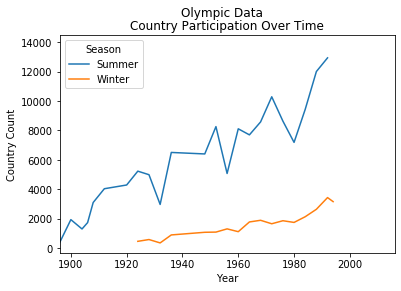

In [107]:
grouped_part_df = merge_table.groupby(['Season','Year'])
grouped_part_df = grouped_part_df['Country'].count()

chart = grouped_part_df.unstack('Season').plot(kind = "line")

plt.suptitle('Olympic Data')
plt.title('Country Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Country Count')

plt.show()

In [ ]:
# country_list = merge_table['Country'].unique()

# heatmap_df = pd.DataFrame(country_list)
# heatmap_df.columns=["Country"]

# heatmap_df["Lat"] = ""
# heatmap_df["Lng"] = ""
# heatmap_df.head()

# # create a params dict that will be updated with new city each iteration
# params = {"key": ashleys_key}

# # Loop through the cities_pd and run a lat/long search for each city
# for index, row in heatmap_df.iterrows():
    
#     base_url = "https://maps.googleapis.com/maps/api/geocode/json"

#     country = row['Country']

#     # update address key value
#     params['address'] = f"{country}"

#     # make request
#     countries_lat_lng = requests.get(base_url, params=params)
    
#     # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
#     #print(countries_lat_lng.url)
    
#     # convert to json
#     countries_lat_lng = countries_lat_lng.json()

#     heatmap_df.loc[index, "Lat"] = countries_lat_lng["results"][0]["geometry"]["location"]["lat"]
#     heatmap_df.loc[index, "Lng"] = countries_lat_lng["results"][0]["geometry"]["location"]["lng"]

# # Visualize to confirm lat lng appear
# heatmap_df.head()
# heatmap_df.to_csv(r'coordinates.csv')

In [108]:
coords_df = pd.read_csv (r'coordinates.csv')
coords_df = coords_df.drop(columns = 'Unnamed: 0')
coords_df.head()

,Country,Lat,Lng
0,China,35.861660,104.195397
1,Denmark,56.263920,9.501785
2,Netherlands,52.132633,5.291266
3,United States,37.090240,-95.712891
4,Finland,61.924110,25.748151


In [109]:
map_df = merge_table[['Season','Year','Country','Name']]
#map_df = map_df.set_index('Season')
map_df.head()
#SUMMER DF
summer_df = map_df[map_df['Season'].str.contains('Summer')]
summer_df.head()
summer_df = summer_df.groupby(['Year',"Country"], as_index = False)
summer_df = summer_df['Name'].count()
summer_df = pd.DataFrame(summer_df)
summer_df = summer_df[['Country','Year','Name']]
print("SUMMER DF HEAD")
print(f"Total Countries: {summer_df['Country'].nunique()}")
print(summer_df.head())
#WINTER DF
winter_df = map_df[map_df['Season'].str.contains('Winter')]
winter_df.head()
winter_df = winter_df.groupby(['Year',"Country"], as_index = False)
winter_df = winter_df['Name'].count()
winter_df = pd.DataFrame(winter_df)
winter_df = winter_df[['Country','Year','Name']]
print("""
WINTER DF HEAD""")
print(f"Total Countries: {winter_df['Country'].nunique()}")
print(winter_df.head())

SUMMER DF HEAD
Total Countries: 205
     Country  Year  Name
0  Australia  1896     5
1    Austria  1896     8
2    Denmark  1896    15
3     France  1896    26
4    Germany  1896    94

WINTER DF HEAD
Total Countries: 111
          Country  Year  Name
0       Australia  1924     1
1         Austria  1924     4
2         Belgium  1924    32
3          Canada  1924    17
4  Czech Republic  1924    31


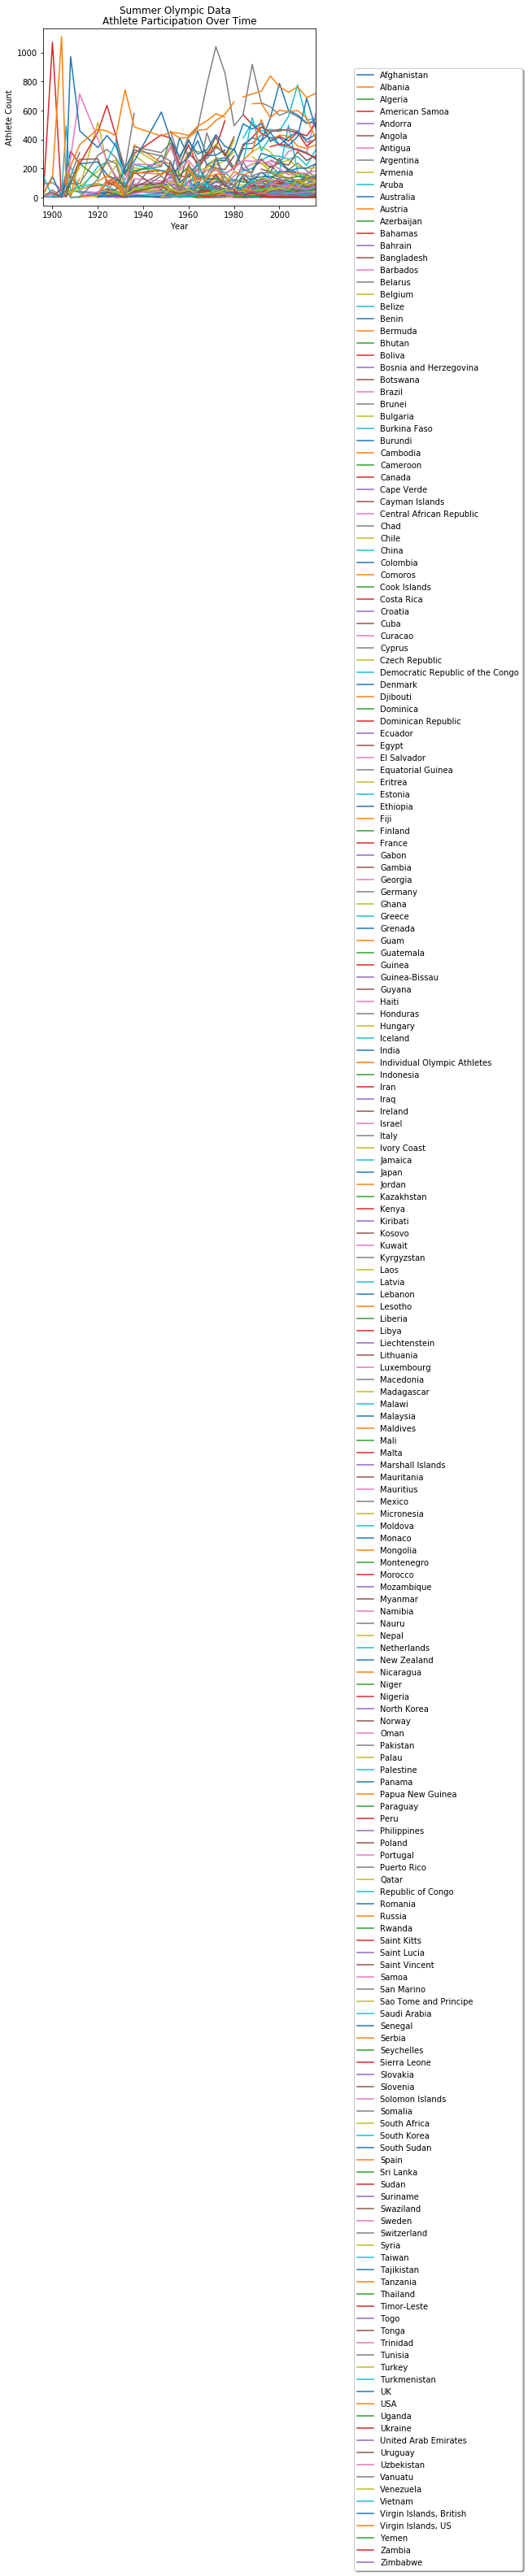

In [110]:
summer_chart = summer_df.pivot(index='Year', columns='Country', values='Name')
summer_chart.plot()
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

plt.suptitle('Summer Olympic Data')
plt.title('Athlete Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Athlete Count')

plt.show()

#1932 US has most participants - great depression most countries couldn't afford to attend
#1980 many countries including the US boycotted the USSRs invasion of Afghanastan, the games were in Moscow

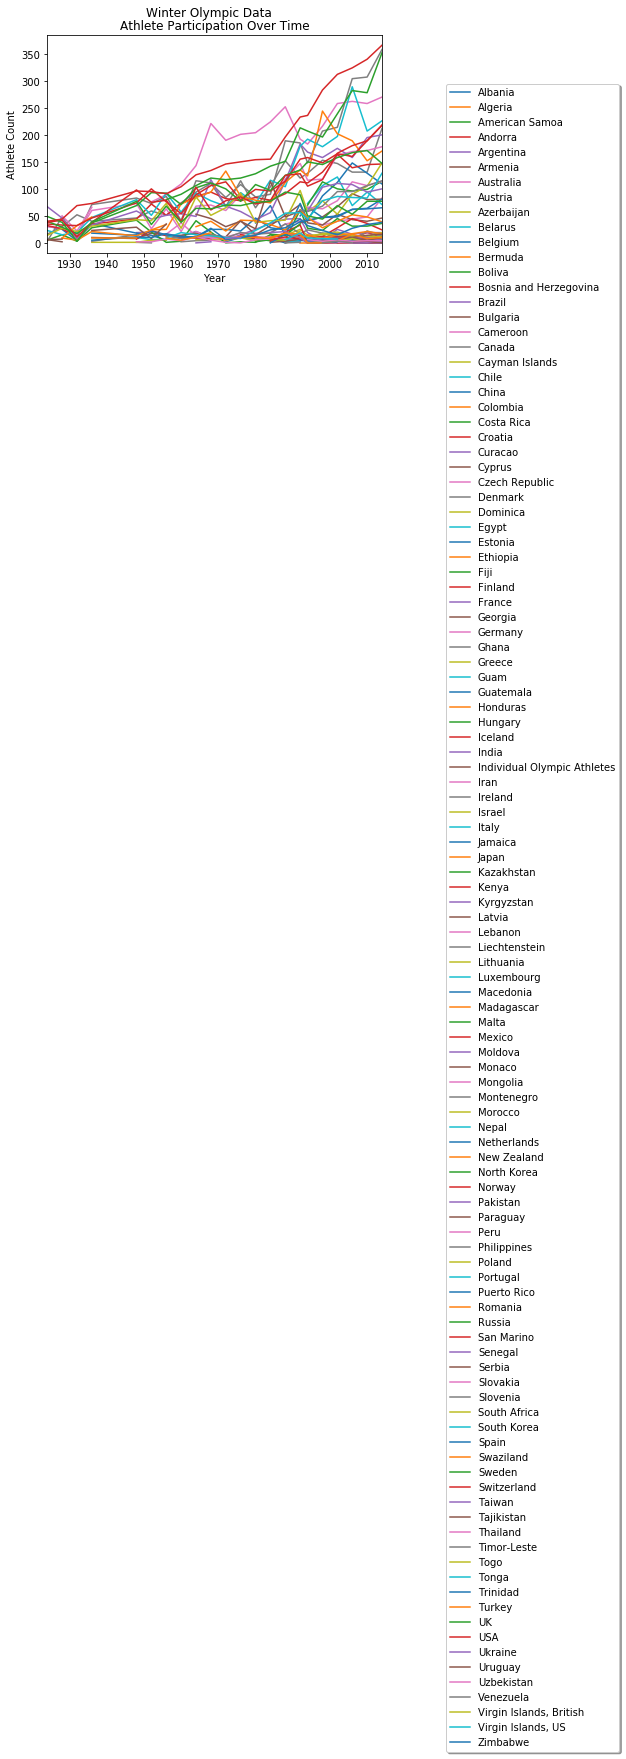

In [111]:
winter_chart = winter_df.pivot(index='Year', columns='Country', values='Name')
winter_chart.plot()
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

plt.suptitle('Winter Olympic Data')
plt.title('Athlete Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Athlete Count')

plt.show()